PART ONE

{(15, 21), (26, 21), (7, 17), (47, 53), (55, 66), (47, 62), (7, 26), (7, 35), (17, 67), (9, 63), (63, 43), (29, 50), (21, 46), (6, 57), (63, 61), (11, 23), (29, 59), (29, 68), (10, 27), (33, 47), (3, 6), (33, 56), (25, 52), (3, 15), (66, 53), (25, 61), (67, 27), (43, 69), (32, 69), (3, 33), (24, 65), (13, 65), (35, 65), (67, 45), (67, 36), (55, 43), (59, 41), (14, 51), (15, 16), (15, 25), (67, 63), (7, 21), (59, 59), (47, 57), (28, 53), (59, 68), (9, 49), (7, 30), (17, 62), (63, 29), (63, 38), (9, 67), (6, 43), (11, 9), (63, 56), (29, 63), (40, 63), (21, 59), (62, 69), (3, 1), (10, 49), (51, 59), (3, 19), (51, 68), (67, 31), (35, 60), (59, 27), (70, 27), (67, 40), (3, 37), (35, 69), (13, 69), (16, 65), (67, 49), (7, 7), (59, 45), (67, 58), (70, 45), (7, 16), (55, 65), (59, 63), (9, 44), (5, 55), (69, 67), (63, 33), (9, 62), (21, 27), (6, 29), (29, 49), (6, 47), (21, 45), (62, 55), (10, 17), (39, 62), (54, 69), (2, 31), (20, 67), (3, 5), (66, 43), (2, 49), (3, 14), (51, 63), (35, 46), (

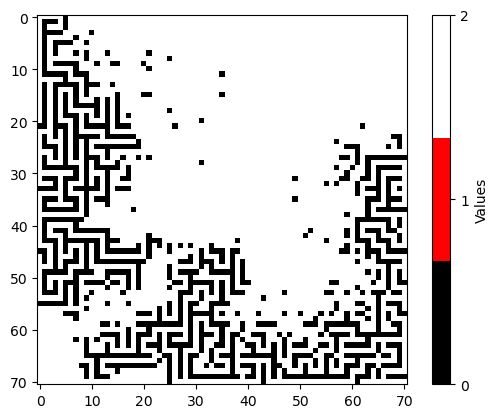

Found! 380 380
Found! 378 378
Found! 376 376
Found! 374 374
Found! 370 370
Found! 368 368
Found! 366 366
Found! 364 364
Found! 362 362
Found! 360 360
Found! 356 356
Found! 354 354
Found! 352 352
Found! 350 350
Found! 348 348
Found! 346 346
Found! 344 344
Found! 342 342
Found! 340 340
Found! 338 338
Found! 336 336
Found! 334 334
Found! 332 332
Found! 330 330
Found! 328 328
Found! 326 326
Found! 324 324
Found! 322 322
Found! 320 320
Found! 318 318
Found! 316 316
Found! 314 314
Found! 312 312
Found! 310 310
Found! 308 308
Found! 306 306
Found! 304 304
Found! 302 302
Found! 300 300
Found! 298 298
Found! 296 296
Found! 294 294
Found! 292 292
Found! 290 290
290


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def ImportToSet(filepath,num):
    with open(filepath,'r') as file:
        lines = [line.strip().split(',') for line in file.readlines()]
        bytes_set = set()
        for byte in range(0, num):
            x_co, y_co = lines[byte]
            bytes_set.add((int(x_co), int(y_co)))
    return bytes_set

def InitiaiseScenario(Scenario):
    if Scenario == 'Test':
        BoardSize = 7
        Bytes_Txt = 'Day18Test.txt'
        Bytes_To_Take = 12
    elif Scenario == 'Input':
        BoardSize = 71
        Bytes_Txt = 'Day18Input.txt'
        Bytes_To_Take = 1024
    elif Scenario == 'Easy':
        BoardSize = 4
        Bytes_Txt = 'Day18Easy.txt'
        Bytes_To_Take = 2

    return BoardSize, Bytes_Txt, Bytes_To_Take

def PrintGrid(Bytes, Places, BoardSize):
    Grid = np.full((BoardSize, BoardSize), '.')
    for item in Bytes:
        Grid[item[1], item[0]]='#'
    for item in Places:
        Grid[item[1], item[0]]='0'
    return Grid


def PlotGrid(Bytes, Places, BoardSize):
    # Define a color map: 0 for '#', 1 for '0', and 2 for '.'
    Grid = np.full((BoardSize, BoardSize), 2)  # Create a grid with a default value of 2
    for item in Bytes:
        Grid[item[1], item[0]] = 0  # Assign 0 for bytes
    for item in Places:
        Grid[item[1], item[0]] = 1  # Assign 1 for places

    cmap = plt.cm.colors.ListedColormap(['black', 'red', 'white'])
    plt.imshow(Grid, cmap=cmap, origin='upper', interpolation='none')
    plt.grid(False)  # Disable grid lines
    plt.colorbar(ticks=[0, 1, 2], label='Values')
    plt.show()

ShortestPathToIndex={}

def ShortestPathFromS (index, length_so_far, set_so_far):
    x_co, y_co = index

    if (x_co, y_co) in ShortestPathToIndex:
        if ShortestPathToIndex[(x_co, y_co)][0]<= length_so_far:
            #print('Cut Short')
            return

    global Grid
    global MinScore
    global Selected_Bytes
    BoardSize = Grid.shape[0]

    if length_so_far >= MinScore:
        return

    #print(index, length_so_far)
    set_so_far = set_so_far.copy()
    set_so_far.add((x_co, y_co))       
    ShortestPathToIndex[(x_co, y_co)] = length_so_far, set_so_far

    if index[0] == BoardSize-1 and index [1]==BoardSize-1:
        MinScore=min(length_so_far, MinScore)
        print('Found!', length_so_far,  MinScore)
        #PlotGrid(Selected_Bytes, set_so_far, BoardSize)
        return

    if y_co < BoardSize-1 and not ((x_co, y_co+1) in set_so_far) and not ((x_co, y_co+1) in Selected_Bytes):
        ShortestPathFromS([x_co, y_co+1], length_so_far+1, set_so_far)
    if x_co < BoardSize - 1 and not ((x_co+1, y_co) in set_so_far) and not ((x_co+1, y_co) in Selected_Bytes):
        ShortestPathFromS([x_co+1, y_co], length_so_far+1, set_so_far)
    if y_co>0 and not ((x_co, y_co-1) in set_so_far) and not ((x_co, y_co-1) in Selected_Bytes):
        ShortestPathFromS([x_co, y_co-1], length_so_far+1, set_so_far)
    if x_co >0 and not ((x_co-1, y_co) in set_so_far) and not ((x_co-1, y_co) in Selected_Bytes):
        ShortestPathFromS([x_co-1, y_co], length_so_far+1, set_so_far)


#--- Program ---
Scenario = 'Input'
BoardSize, Bytes_Txt, Bytes_To_Take = InitiaiseScenario(Scenario)

Selected_Bytes =ImportToSet(Bytes_Txt, Bytes_To_Take)
print(Selected_Bytes)

Grid = PrintGrid(Selected_Bytes, set(), BoardSize)
Grid[0,0] = 'S'
Grid[BoardSize-1, BoardSize-1]='E'
#print(Grid)

PlotGrid(Selected_Bytes, set(), BoardSize)

MinScore = 1e9
ShortestPathFromS([0,0], 0, set())

print(MinScore)




PART TWO


In [39]:
import numpy as np
import matplotlib.pyplot as plt

def ImportToList(filepath):
    with open(filepath,'r') as file:
        lines = [list(map(int,line.strip(). split(','))) for line in file.readlines()]
    return lines

def InitiaiseScenario(Scenario):
    if Scenario == 'Test':
        BoardSize = 7
        Bytes_Txt = 'Day18Test.txt'
        Bytes_To_Take = 12
    elif Scenario == 'Input':
        BoardSize = 71
        Bytes_Txt = 'Day18Input.txt'
        Bytes_To_Take = 1024
    elif Scenario == 'Easy':
        BoardSize = 4
        Bytes_Txt = 'Day18Easy.txt'
        Bytes_To_Take = 2

    return BoardSize, Bytes_Txt, Bytes_To_Take

def PrintGrid(Bytes, Places, BoardSize):
    Grid = np.full((BoardSize, BoardSize), '.')
    for item in Bytes:
        Grid[item[1], item[0]]='#'
    for item in Places:
        Grid[item[1], item[0]]='0'
    return Grid


def PlotGrid(Bytes, Places, BoardSize):
    # Define a color map: 0 for '#', 1 for '0', and 2 for '.'
    Grid = np.full((BoardSize, BoardSize), 2)  # Create a grid with a default value of 2
    for item in Bytes:
        Grid[item[1], item[0]] = 0  # Assign 0 for bytes
    for item in Places:
        Grid[item[1], item[0]] = 1  # Assign 1 for places

    cmap = plt.cm.colors.ListedColormap(['black', 'red', 'white'])
    plt.imshow(Grid, cmap=cmap, origin='upper', interpolation='none')
    plt.grid(False)  # Disable grid lines
    plt.colorbar(ticks=[0, 1, 2], label='Values')
    plt.show()

ShortestPathToIndex={}

def ShortestPathFromS (index, length_so_far, set_so_far):
    x_co, y_co = index

    if (x_co, y_co) in ShortestPathToIndex:
        if ShortestPathToIndex[(x_co, y_co)][0]<= length_so_far:
            #print('Cut Short')
            return

    global Grid
    global MinScore
    global MinSet
    global Selected_Bytes
    BoardSize = Grid.shape[0]

    if length_so_far >= MinScore:
        return

    #print(index, length_so_far)
    set_so_far = set_so_far.copy()
    set_so_far.add((x_co, y_co))       
    ShortestPathToIndex[(x_co, y_co)] = length_so_far, set_so_far

    if index[0] == BoardSize-1 and index [1]==BoardSize-1:
        MinScore=min(length_so_far, MinScore)
        MinSet = set_so_far
        #print('Found!', length_so_far,  MinScore)
        #PlotGrid(Selected_Bytes, set_so_far, BoardSize)
        return

    if y_co < BoardSize-1 and not ((x_co, y_co+1) in set_so_far) and not ((x_co, y_co+1) in Selected_Bytes):
        ShortestPathFromS([x_co, y_co+1], length_so_far+1, set_so_far)
    if x_co < BoardSize - 1 and not ((x_co+1, y_co) in set_so_far) and not ((x_co+1, y_co) in Selected_Bytes):
        ShortestPathFromS([x_co+1, y_co], length_so_far+1, set_so_far)
    if y_co>0 and not ((x_co, y_co-1) in set_so_far) and not ((x_co, y_co-1) in Selected_Bytes):
        ShortestPathFromS([x_co, y_co-1], length_so_far+1, set_so_far)
    if x_co >0 and not ((x_co-1, y_co) in set_so_far) and not ((x_co-1, y_co) in Selected_Bytes):
        ShortestPathFromS([x_co-1, y_co], length_so_far+1, set_so_far)


def IsThereAPath(Grid):
    global MinScore
    global ShortestPathToIndex
    ShortestPathToIndex={}
    MinScore = 1e9
    ShortestPathFromS([0,0], 0, set())
    return not MinScore == 1e9


#--- Program ---
Scenario = 'Input'
BoardSize, Bytes_Txt, Bytes_To_Take = InitiaiseScenario(Scenario)

MinSet = set()
Selected_Bytes = set()

Grid = PrintGrid(Selected_Bytes, set(), BoardSize)
Grid[0,0] = 'S'
Grid[BoardSize-1, BoardSize-1]='E'
print(set(), IsThereAPath(Grid))

Check = True
Byte_To_Take = 0
while Check:
    All_Bytes = ImportToList(Bytes_Txt)
    New_Byte = All_Bytes[Byte_To_Take]
    Selected_Bytes.add(tuple(New_Byte))

    if tuple(New_Byte) in MinSet:
        Grid = PrintGrid(Selected_Bytes, set(), BoardSize)
        Grid[0,0] = 'S'
        Grid[BoardSize-1, BoardSize-1]='E'
        Check = IsThereAPath(Grid)
        print(Byte_To_Take, Check )
    
    Byte_To_Take +=1

print(Byte_To_Take, Check, New_Byte )


set() True
118 True
127 True
239 True
277 True
320 True
402 True
429 True
445 True
448 True
466 True
470 True
471 True
495 True
522 True
523 True
531 True
539 True
551 True
593 True
634 True
658 True
695 True
732 True
733 True
739 True
750 True
759 True
766 True
778 True
801 True
804 True
831 True
852 True
888 True
933 True
934 True
943 True
944 True
952 True
955 True
978 True
986 True
989 True
993 True
997 True
998 True
1000 True
1007 True
1016 True
1017 True
1020 True
1021 True
1023 True
1061 True
1073 True
1132 True
1161 True
1163 True
1195 True
1331 True
1425 True
1439 True
1455 True
1467 True
1501 True
1504 True
1652 True
1755 True
2040 True
2175 True
2192 True
2257 True
2291 True
2307 True
2310 True
2371 True
2376 True
2392 True
2422 True
2424 True
2428 True
2433 True
2987 False
2988 False [64, 54]
